<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

c:\users\nasa\anaconda3\envs\mytfenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\nasa\anaconda3\envs\mytfenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

single_image = x_train[0]

In [5]:
single_image.shape

(28, 28)

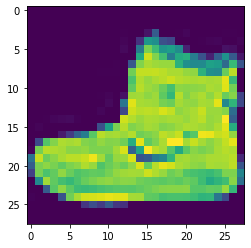

In [6]:
plt.imshow(single_image)

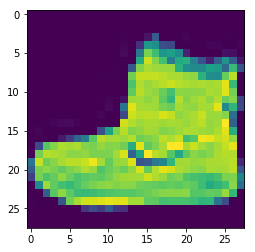

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

255

In [7]:
x_train.max()

255

In [8]:
x_test.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
#now that I have shaped an understanding of the "y" data, I will change it to catagorial data or one-hot encode it: 

from tensorflow.keras.utils import to_categorical

In [21]:
y_train_catagory = to_categorical(y_train, num_classes = 10) #num_classes = 10: we can also delete this part, since the "fashion_MINIST" data has actually 10 labels (as explaied on the top of this notebook page).

y_test_catagory = to_categorical(y_test, num_classes = 10)

In [22]:
# y_train_catagory
y_train_catagory[0] #so as we see bellow, the "y" data is changed to one-hot encoding.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
# y_test_catagory
y_test_catagory[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten #, Dropout

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4, 4), strides = (1, 1), activation = 'relu')) #input_shape = (28, 28, 1): input data is by default (28, 28), plus we reshaped it as (28, 28, 1) in the formers code lines.
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
          
model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))
        
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [28]:
#EarlyStopping to avoid over-fitting:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [30]:
model.fit(x = x_train, y = y_train_catagory, epochs = 10, validation_data = [x_test, y_test_catagory], callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.4018 - accuracy: 0.8562 - val_loss: 0.3168 - val_accuracy: 0.8859
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2784 - accuracy: 0.8995 - val_loss: 0.2967 - val_accuracy: 0.8930
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2397 - accuracy: 0.9130 - val_loss: 0.2901 - val_accuracy: 0.9014
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2156 - accuracy: 0.9224 - val_loss: 0.2697 - val_accuracy: 0.9061
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1970 - accuracy: 0.9294 - val_loss: 0.2981 - val_accuracy: 0.8993


In [ ]:
#great! we have got quite high accuary and low loss.

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  589952    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
metrics = pd.DataFrame(model.history.history)
metrics

#as we can see bellow, the accuracy increases gradually and loss decreases as the epohs increase.

,loss,accuracy,val_loss,val_accuracy
0,0.401784,0.856183,0.316771,0.8859
1,0.278405,0.899483,0.296707,0.8930
2,0.239669,0.913033,0.290083,0.9014
3,0.215605,0.922367,0.269716,0.9061
4,0.197000,0.929383,0.298096,0.8993


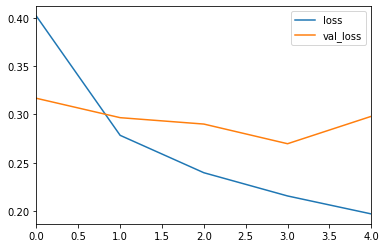

In [34]:
metrics[['loss', 'val_loss']].plot()

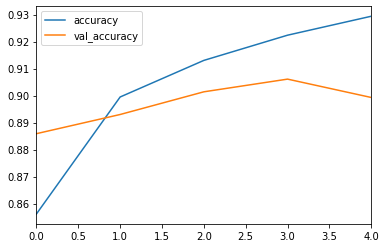

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

In [37]:
model.evaluate(x = x_test, y = y_test_catagory, verbose = 0) #according to "model.metrics_names = ['loss', 'accuracy']", the "loss = 0.2901143666625023" and the "accuracy = 0.9033", which is pretty good!

[0.29809586766958235, 0.8993]

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_true = y_test, y_pred = predictions))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.74      0.82      1000
           3       0.92      0.91      0.91      1000
           4       0.80      0.90      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.66      0.81      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [41]:
#some extra job: :D

confusion_matrix(y_true = y_test, y_pred = predictions)

array([[783,   1,   8,  11,   5,   3, 185,   0,   4,   0],
       [  0, 983,   0,   9,   1,   0,   4,   0,   3,   0],
       [  9,   1, 739,   8, 120,   0, 123,   0,   0,   0],
       [ 14,   8,   4, 905,  27,   0,  42,   0,   0,   0],
       [  0,   1,  10,  23, 902,   0,  63,   0,   1,   0],
       [  0,   0,   0,   0,   0, 961,   0,  28,   0,  11],
       [ 54,   1,  39,  23,  67,   0, 809,   0,   7,   0],
       [  0,   0,   0,   0,   0,   4,   0, 977,   1,  18],
       [  2,   0,   0,   6,   0,   2,   8,   5, 977,   0],
       [  0,   0,   0,   0,   0,   4,   1,  38,   0, 957]], dtype=int64)

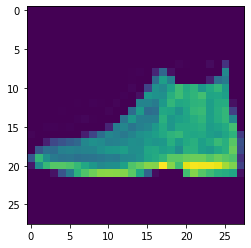

In [44]:
#now let's evaluate how our model can predict a single image data from the x_test (test data set):

test_single_image = x_test[0]
plt.imshow(test_single_image.reshape(28, 28)) #remember to reshape the data to its original format (28, 28). Because in the middle of this code, we had to change it to (28, 28, 1).

In [46]:
y_test[0] #so "9" means "label 9" which as it is written at the top of the page is for "ankle boot".

9

In [49]:
#so let's see if our model can predict if this image is reallllly an "label 9 = ankle boot"!!!

model.predict_classes(test_single_image.reshape(1, 28, 28, 1))

array([9], dtype=int64)

In [ ]:
#so as we see above it did predict label 9!!!

# Great Job!